In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU', 'XLRE', 'XLC']
prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']

prices.dropna(inplace=True)

prices.head()

/var/folders/qd/xclxh05s0x9509nblm6z434w0000gp/T/ipykernel_35253/2919939680.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']
[*********************100%***********************]  11 of 11 completed


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-19,50.676594,46.785172,54.391655,23.865805,64.921265,66.629021,42.327549,24.852903,40.213203,75.310692,104.431396
2018-06-20,50.511971,47.365788,54.631813,23.804718,64.965584,66.768936,42.369011,25.121161,40.245258,75.470406,104.926559
2018-06-21,49.974808,47.075481,53.620255,23.734911,64.149979,66.255920,42.451897,25.271061,40.381454,75.035553,104.179138
2018-06-22,50.702595,47.281502,54.690029,23.621475,64.371590,66.041374,42.800072,25.491976,40.661888,75.372803,104.001648
2018-06-25,49.914143,46.307590,53.591129,23.368416,63.556004,64.670143,43.015606,25.428854,41.334915,74.680588,101.740753


In [19]:
normalized_prices = prices / prices.iloc[0] 

etfs = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU', 'XLRE', 'XLC']

pair_list = []
for i in range(len(etfs)):
    for j in range(i + 1, len(etfs)):  # avoid duplicates and self-pairs
        pair_list.append((etfs[i], etfs[j]))

pair_distances = []
for etf1, etf2 in pair_list:
    distance = np.sqrt(np.sum((normalized_prices[etf1] - normalized_prices[etf2]) ** 2))
    pair_distances.append({'Pair': f'{etf1}-{etf2}', 'Distance': distance})

distance_df = pd.DataFrame(pair_distances).sort_values(by='Distance')

distance_df = distance_df[:11]

distance_df


,Pair,Distance
42,XLP-XLU,1.509983
9,XLB-XLC,1.586496
52,XLU-XLRE,1.591180
40,XLP-XLV,1.601815
2,XLB-XLI,1.606396
43,XLP-XLRE,1.783385
51,XLY-XLC,1.837133
19,XLF-XLI,2.023956
45,XLV-XLY,2.127861
33,XLI-XLC,2.300201


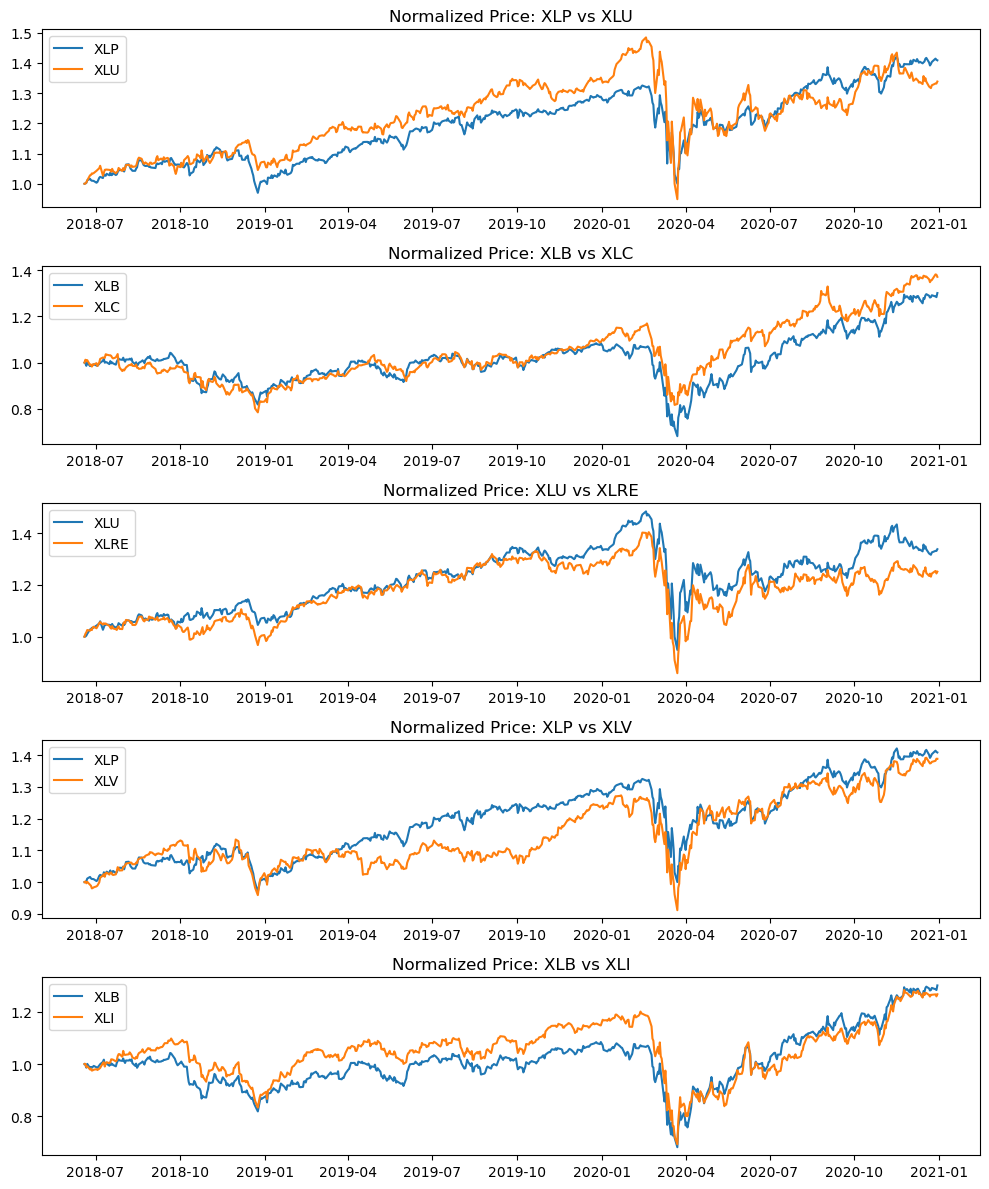

In [20]:
top_5_pairs = distance_df.head(5)['Pair'].tolist()
fig, axs = plt.subplots(len(top_5_pairs), 1, figsize=(10, 12))
for i, pair in enumerate(top_5_pairs):
    etf1, etf2 = pair.split('-')
    axs[i].plot(normalized_prices[etf1], label=etf1)
    axs[i].plot(normalized_prices[etf2], label=etf2)
    axs[i].set_title(f'Normalized Price: {etf1} vs {etf2}')
    axs[i].legend()
plt.tight_layout()
plt.show()